In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('comptab_2018-01-29 16_00_comma_separated.csv')
data.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [3]:
data.describe()

,Year,Importer reported quantity,Exporter reported quantity
count,67161.000000,3.186600e+04,4.402100e+04
mean,2016.002293,4.382425e+03,4.443878e+03
std,0.047831,1.449103e+05,1.573794e+05
min,2016.000000,0.000000e+00,2.000000e-06
25%,2016.000000,3.000000e+00,2.000000e+00
50%,2016.000000,1.200000e+01,1.200000e+01
75%,2016.000000,8.000000e+01,8.200000e+01
max,2017.000000,1.952498e+07,2.154362e+07


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

#### DATA CLEANING

In [5]:
data.isnull().sum()

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64

In [6]:
null_values_dict = dict(data.isnull().sum())

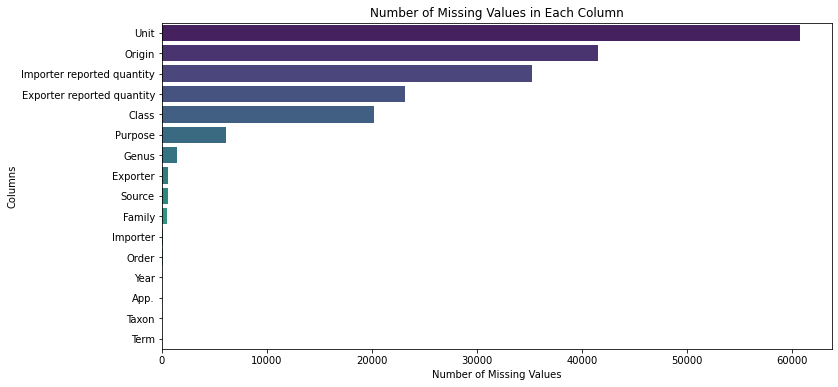

In [7]:
missing_values = data.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x=missing_values, y=missing_values.index, palette='viridis')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Number of Missing Values in Each Column')
plt.show()

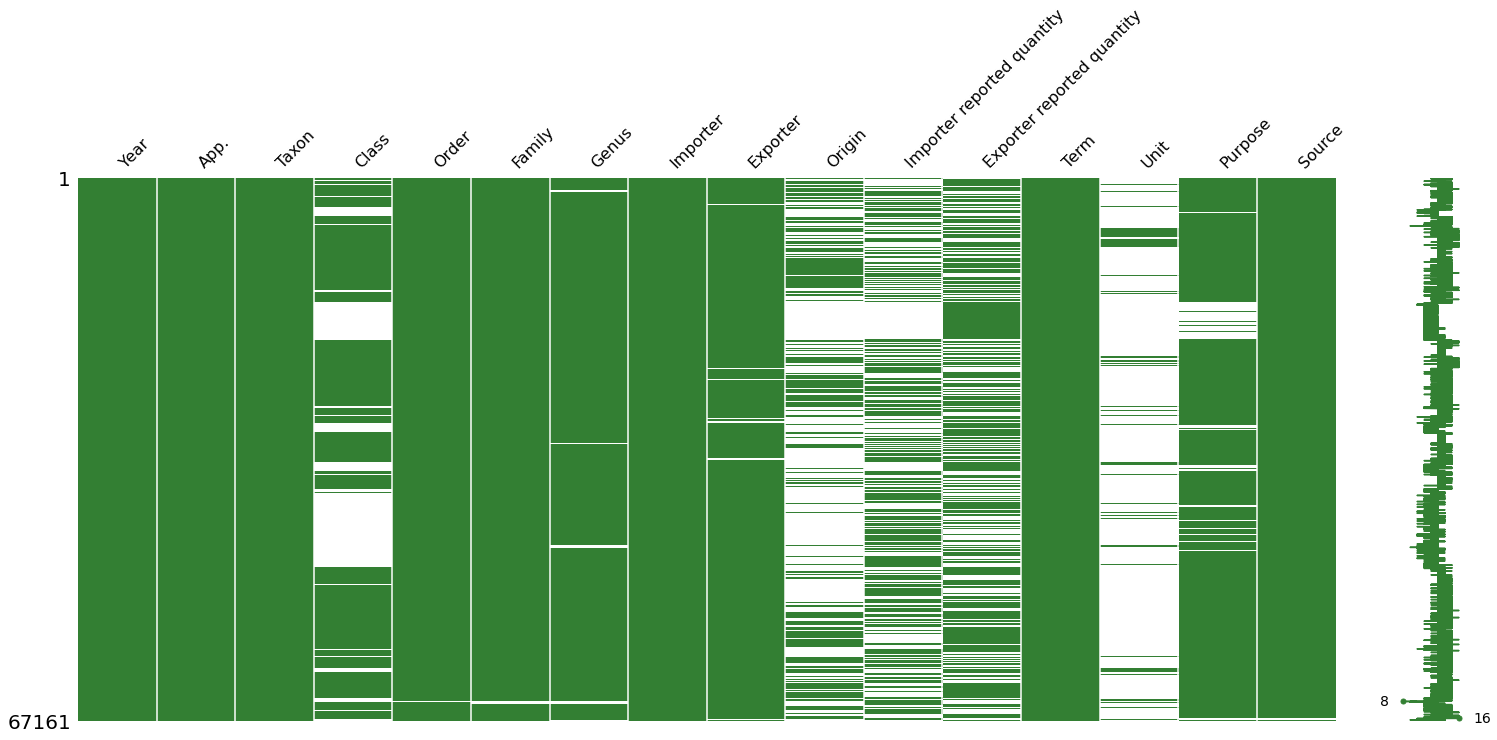

In [8]:
msno.matrix(data, color=(0.2, 0.5, 0.2))
plt.show()

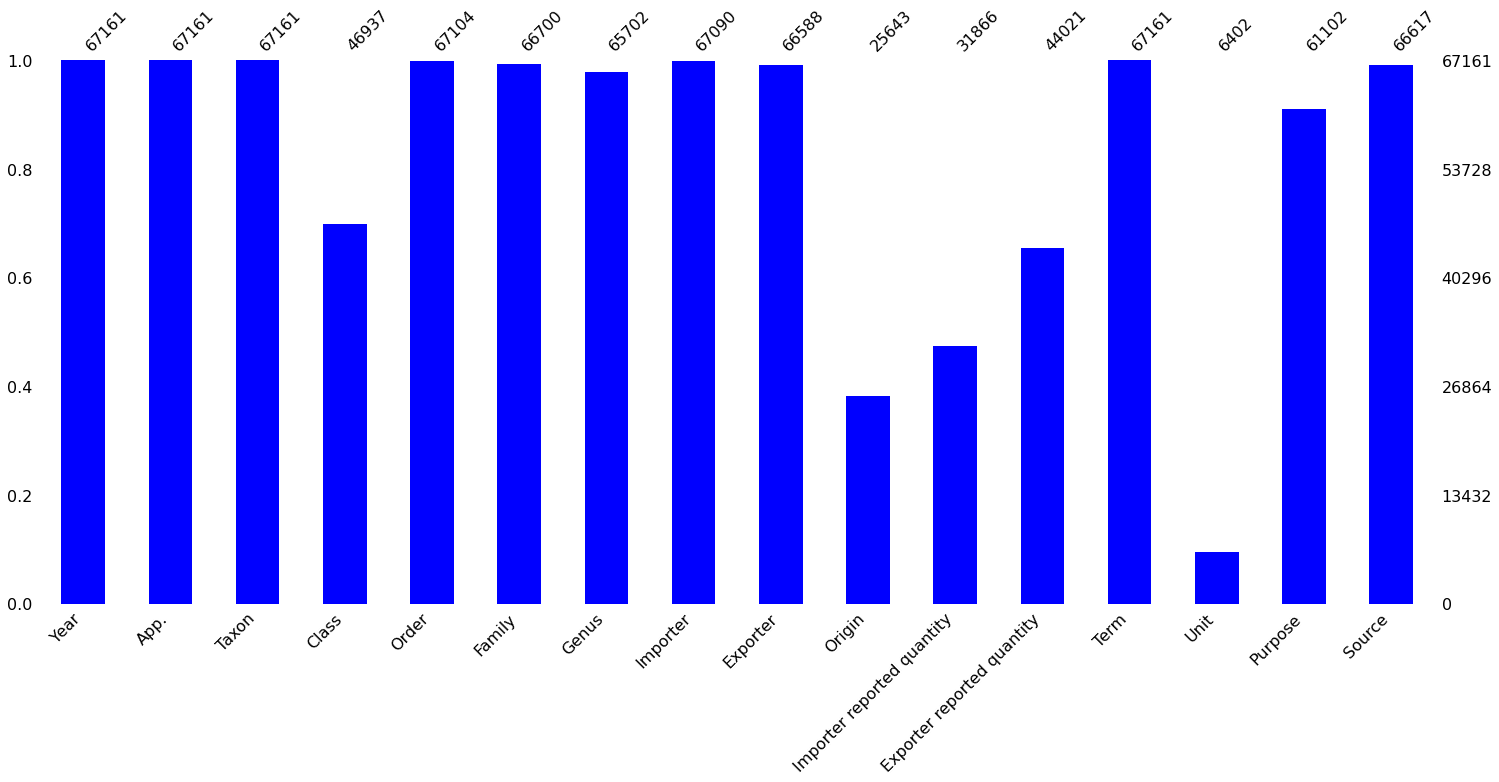

In [9]:
msno.bar(data, color='b')
plt.show()

<AxesSubplot:>

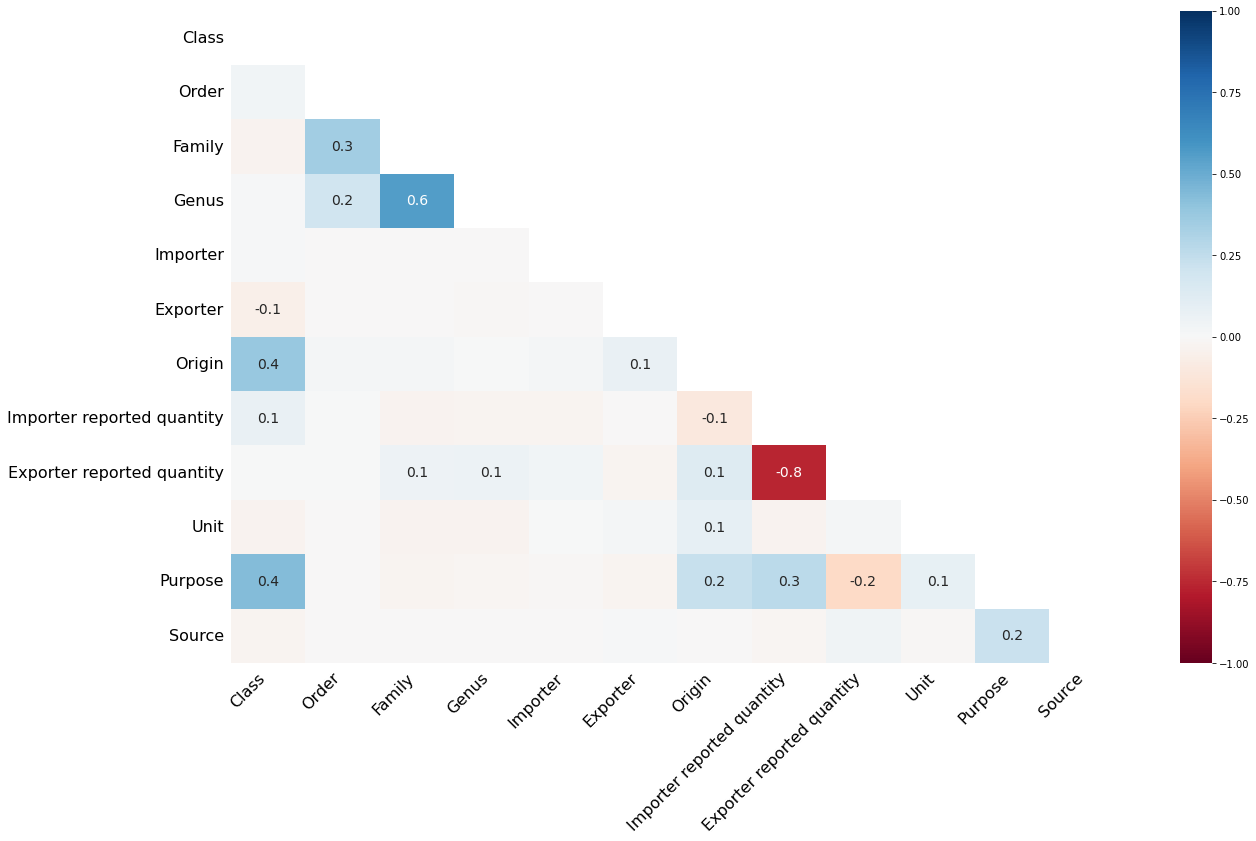

In [10]:
msno.heatmap(data)

In [11]:
# Dropping highly useless columns

null_values_df = pd.DataFrame.from_dict(null_values_dict, orient='index', columns=['Null_Values'])


In [12]:
null_values_df

,Null_Values
Year,0
App.,0
Taxon,0
Class,20224
Order,57
Family,461
Genus,1459
Importer,71
Exporter,573
Origin,41518


In [13]:
threshold = 0.10 * len(data)

In [14]:
# Dropping columns with more than 10% missing values

columns_to_drop = null_values_df[null_values_df['Null_Values'] > threshold].index

In [15]:
trimmed_data = data.drop(columns = columns_to_drop)

In [16]:
trimmed_data

,Year,App.,Taxon,Order,Family,Genus,Importer,Exporter,Term,Purpose,Source
0,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,TR,NL,bodies,T,C
1,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,XV,RS,bodies,Q,O
2,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,NO,feathers,S,W
3,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,NO,specimens,S,W
4,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,DK,IS,specimens,S,W
...,...,...,...,...,...,...,...,...,...,...,...
67156,2017,III,Canis aureus,Carnivora,Canidae,Canis,US,ET,trophies,H,W
67157,2017,III,Sarcoramphus papa,Falconiformes,Cathartidae,Sarcoramphus,JP,PE,live,T,F
67158,2017,III,Daboia russelii,Serpentes,Viperidae,Daboia,RS,IT,specimens,T,F
67159,2017,III,Civettictis civetta,Carnivora,Viverridae,Civettictis,FR,ET,musk,T,R


In [17]:
trimmed_data['Source'].unique()

array(['C', 'O', 'W', 'U', 'I', 'F', 'D', 'A', 'X', nan, 'R'],
      dtype=object)

<AxesSubplot:>

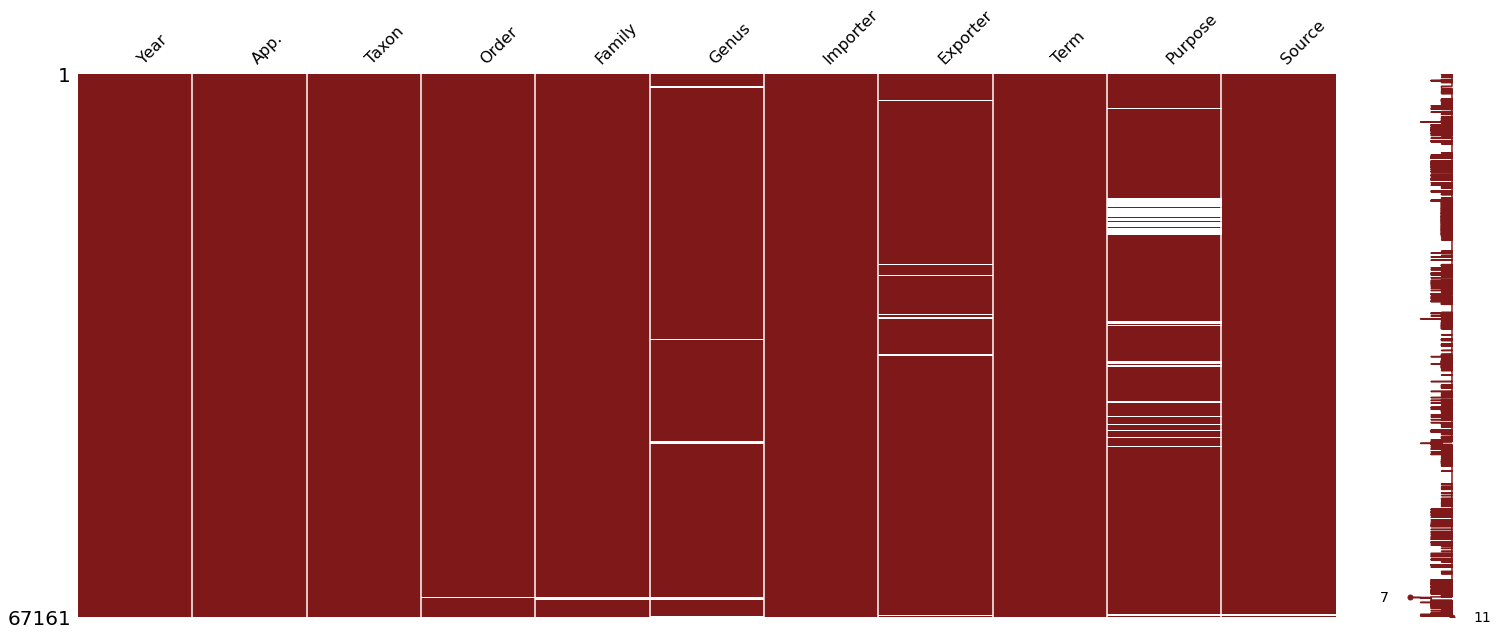

In [18]:
# checking the number of missing values in each column again

msno.matrix(trimmed_data, color=(0.5, 0.1, 0.1))

In [19]:
trimmed_data['Importer'].unique()

array(['TR', 'XV', 'BE', 'DK', 'BR', 'CH', 'US', 'AU', 'CA', 'IL', 'JP',
       'KP', 'KR', 'MC', 'GB', 'CN', 'SG', 'ZA', 'NL', 'DE', 'AT', 'NO',
       'RU', 'FR', 'XX', 'FO', 'IS', 'ES', 'SE', 'ID', 'IR', 'AR', 'HU',
       'IT', 'MX', 'OM', 'PK', 'VN', 'AE', 'BY', 'FI', 'PH', 'UZ', 'TN',
       'PT', 'CZ', 'LT', 'RS', 'SK', 'TD', 'KW', 'QA', 'SA', 'TW', 'TZ',
       'BH', 'TH', 'BS', 'CR', 'KG', 'KZ', 'SR', 'NZ', 'PA', 'BG', 'GR',
       'IN', 'HK', 'PL', 'RO', 'NP', 'MY', 'JE', 'MD', 'BB', 'RE', 'PE',
       'PF', 'CU', 'SN', 'BD', 'CO', 'EG', 'MA', 'SZ', 'AM', 'AZ', 'BL',
       'UA', 'UG', 'BN', 'CG', 'LB', 'MO', 'TM', 'CY', 'MG', 'CL', 'GG',
       'IE', 'KY', 'LI', 'GE', 'BA', 'BM', 'BW', 'ET', 'GL', 'JO', 'KE',
       'KH', 'PG', 'UY', 'ZW', 'MN', 'GI', 'IQ', 'SI', 'SD', 'MM', 'EE',
       'HR', 'LU', 'LV', nan, 'TJ', 'EC', 'CD', 'GT', 'TT', 'IM', 'MK',
       'PY', 'MU', 'NC', 'AF', 'CW', 'GF', 'ME', 'SX', 'AW', 'CI', 'GP',
       'MQ', 'MV', 'LK', 'DZ', 'AO', 'NI', 'DO', 'GH

In [20]:
importer_column_rename_dict = {
    "CN": "China",
    "HK": "China",
    "US": "USA",
    "AE": "United Arab Emirates",
    "BE": "Belgium",
    "CZ": "Czech Republic",
    "NL": "Netherlands",
    "ID": "India",
    "IT": "Italy",
    "SG": "Singapore",
    "MY": "Malaysia",
    "JP": "Japan",
    "MG": "Madagascar",
    "FR": "France",
    "DE": "Germany",
    "GB": "Britain",
    "PE": "Peru",
    "ES": "Spain",
    "ZW": "Zimbabwe",
    "PH": "Philippines",
    "MC": "Monaco",
    "IL": "Israel",
    "AR": "Argentina",
    "GT": "Guatemala",
    "KW": "Kuwait",
    "DK": "Denmark",
    "UY": "Uruguay",
    "GE": "Georgia",
    "PL": "Poland",
    "TN": "Tunisia",
    "KE": "Kenya",
    "NO": "Norway",
    "UG": "Uganda",
    "MA": "Morocco",
    "BS": "Bahamas",
    "NP": "Nepal",
    "IN": "India",
    "NI": "Nicaragua",
    "PY": "Paraguay",
    "AM": "Armenia",
    "TH": "Thailand",
    "CA": "Canada",
    "NG": "Nigeria",
    "MX": "Mexico",
    "CM": "Cameroon",
    "FJ": "Fiji",
    "ZA": "South Africa",
    "JM": "Jamaica",
    "AD": "Andorra"
} 
exporter_column_rename_dict = {
    "CN": "China",
    "HK": "China",
    "US": "USA",
    "AE": "United Arab Emirates",
    "BE": "Belgium",
    "CZ": "Czech Republic",
    "NL": "Netherlands",
    "ID": "Indonesia",
    "IT": "Italy",
    "SG": "Singapore",
    "MY": "Malaysia",
    "JP": "Japan",
    "MG": "Madagascar",
    "FR": "France",
    "DE": "Germany",
    "GB": "Britain",
    "PE": "Peru",
    "ES": "Spain",
    "ZW": "Zimbabwe",
    "PH": "Philippines",
    "MC": "Monaco",
    "IL": "Israel",
    "AR": "Argentina",
    "GT": "Guatemala",
    "KW": "Kuwait",
    "DK": "Denmark",
    "UY": "Uruguay",
    "GE": "Georgia",
    "PL": "Poland",
    "TN": "Tunisia",
    "KE": "Kenya",
    "NO": "Norway",
    "UG": "Uganda",
    "MA": "Morocco",
    "BS": "Bahamas",
    "NP": "Nepal",
    "IN": "India",
    "NI": "Nicaragua",
    "PY": "Paraguay",
    "AM": "Armenia",
    "TH": "Thailand",
    "CA": "Canada",
    "NG": "Nigeria",
    "MX": "Mexico",
    "CM": "Cameroon",
    "FJ": "Fiji",
    "ZA": "South Africa",
    "JM": "Jamaica",
    "AD": "Andorra"
} 
purpose_column_rename_dict = {
    "B": "Breeding",
    "E": "Educational",
    "G": "Garden",
    "H": "Hunting",
    "L": "Law",
    "M": "Medical",
    "R": "Reintroduction to Wild",
    "P": "Personal",
    "Q": "Circus",
    "S": "Scientific",
    "T": "Commercial",
    "Z": "Zoo"
}

Source was not renamed, it is better left as it is for the sake of clarity. 

In [21]:
# renaming the data that have the abbreviations

def rename_abbreviated_names(dataframe,column_name,row_rename_dict):
    new_dataframe = dataframe.copy()
    
    # for abbreviated_name, main_name in column_rename_dict.items():
    #     if abbreviated_name in new_dataframe.columns:
    #         new_dataframe.rename(columns = {abbreviated_name : main_name}, inplace = True)

    if column_name in new_dataframe.columns:
        new_dataframe[column_name] = new_dataframe[column_name].map(row_rename_dict)
    
    return new_dataframe

In [22]:
renamed_data = rename_abbreviated_names(trimmed_data, 'Purpose', purpose_column_rename_dict)
renamed_data = rename_abbreviated_names(trimmed_data, 'Importer', importer_column_rename_dict)
renamed_data = rename_abbreviated_names(trimmed_data, 'Exporter', exporter_column_rename_dict)

In [23]:
renamed_data

,Year,App.,Taxon,Order,Family,Genus,Importer,Exporter,Term,Purpose,Source
0,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,TR,Netherlands,bodies,T,C
1,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,XV,NaN,bodies,Q,O
2,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,Norway,feathers,S,W
3,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,Norway,specimens,S,W
4,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,DK,NaN,specimens,S,W
...,...,...,...,...,...,...,...,...,...,...,...
67156,2017,III,Canis aureus,Carnivora,Canidae,Canis,US,NaN,trophies,H,W
67157,2017,III,Sarcoramphus papa,Falconiformes,Cathartidae,Sarcoramphus,JP,Peru,live,T,F
67158,2017,III,Daboia russelii,Serpentes,Viperidae,Daboia,RS,Italy,specimens,T,F
67159,2017,III,Civettictis civetta,Carnivora,Viverridae,Civettictis,FR,NaN,musk,T,R


In [24]:
# Droppping th App column

renamed_data.drop(columns = ['App.'], inplace = True)

In [25]:
renamed_data.to_csv("cleaned_data.csv", index = False)